# Introduction to Machine Learning, UZH 2018, Group Project
### Group 2: Barbara Capl, Mathias Lüthi, Pamela Matias, Stefanie Rentsch
##       
# 3. Support Vector Machines (SVM)

###   
In this section we use the feature matrices and response vectors with features selected in chapter 2. 


In [1]:
# hide unnecessary warnings ("depreciation" of packages etc.)
import warnings
warnings.filterwarnings('ignore')

# Load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
plt.style.use('seaborn-whitegrid')

## 3.0. SETTINGS

### (1) Choose the Dataset Version you want

##### Whole Feature Matrix (Features not pre-selected)
VERSION = 1; Feature Matrix with only ratios                                  
VERSION = 2;  Feature Matrix with ratios + saisonality + other market data

##### Reduced Feature Matrix (Features pre-selected)
VERSION = 1.1; Reduced Feature Matrix with only ratios                                  
VERSION = 2.1;  Reduced Feature Matrix with ratios + saisonality + other market data

In [2]:
### Chose which dataset version you want the selection of features and the prediction to be based on 
VERSION = 2
"""
INSERT NUMBER 1, 2, 1.1 or 2.1
"""



# Defining sel_state variable for easier printing out    
if VERSION == 1:
    sel_version = 'Based on whole original Dataset with only the Ratios Dataset as predicive Features.'
elif VERSION == 2:
    sel_version = 'Based on whole original Dataset with Ratios + Seasonality + other Market Data as predictive Features.'
elif VERSION == 1.1:
    sel_version = 'Based on reduced Dataset with only the Ratios Dataset as predicive Features.'
elif VERSION == 2.1:
    sel_version = 'Based on reduced Dataset with Ratios + Seasonality + other Market Data as predictive Features.'
else: raise ValueError('VERSION must be either 1, 2, 1.1 or 2.1')

### (2) If you chose VERSION 1.1. or VERSION 2.1:  (Reduced Feature Matrix)                                                                  
### => Choose with which method you want to have the features been pre-selected /reduced

##### You have the choice between:
mySELECTION  = RF ; Features pre-selected with Random Forest Classifier                                                           
mySELECTION = PCA; Features pre-selected with Principal Component Analysis (PCA)                                         

##### By Default;
If VERSION 1 or VERSION 2 was chosen above: SELECTION = none by Default; no features pre-selected. You don't need to define variable mySELECTION.

In [3]:
### Choose whether you want the datasets with features selected with RF or PCA or the original file
mySELECTION = 'PCA'
"""
INSERT WISHED METHOD 'RF', 'PCA'
"""



# This is the control loop. If something has been chosen wrong, it returns an error with explanation.
if VERSION == 1 or VERSION == 2:
    SELECTION = 'none'
elif VERSION == 1.1 or VERSION == 2.1:
    SELECTION = mySELECTION
    if mySELECTION is not 'RF' and mySELECTION is not 'PCA':
        raise ValueError('Because VERSION '+str(VERSION)+' is chosen, mySELECTION must be set as either RF or PCA.')
else: raise ValueError('VERSION must be either 1, 2, 1.1 or 2.1. mySELECTION must be chosen as either RF or PCA.')

# Defining of sel_feat (Selected Feature Selection Method) variable and briefing for later.   
if SELECTION == 'RF':
    sel_feat = 'Random Forest (RF)'
    briefing = ('You chose dataset VERSION '+str(VERSION)+' and SELECTION method '+str(SELECTION)+'.'+'\n'+'Features therefore pre-selected with '+str(sel_feat)+'.')
elif SELECTION == 'PCA':
    sel_feat = 'Principal Component Analysis (PCA)'
    briefing = ('You chose dataset VERSION '+str(VERSION)+' and SELECTION method '+str(SELECTION)+'.'+'\n'+'Features therefore pre-selected with '+str(sel_feat)+'.')
elif SELECTION == 'none':
    sel_feat = 'No Feature Selection Method available.'
    briefing = ('You chose VERSION '+str(VERSION)+'. This Version has no Feature Selection Method because Feature Matrix is whole, not reduced.'+'\n'+'SELECTION is therefore "none" by Default.')
else: raise ValueError('mySELECTION must be chosen as either RF or PCA')
print('You chose SELECTION method '+str(sel_feat)+'.')
#print(sel_feat)

You chose SELECTION method No Feature Selection Method available..


### (3) SUMMARY OF SETTINGS

In [4]:
print(briefing, '\n')
print('VERSION '+str(VERSION)+' is '+str(sel_version),'\n')
print('You are now done with the Settings. You can run the whole Code now by Default.')

You chose VERSION 2. This Version has no Feature Selection Method because Feature Matrix is whole, not reduced.
SELECTION is therefore "none" by Default. 

VERSION 2 is Based on whole original Dataset with Ratios + Seasonality + other Market Data as predictive Features. 

You are now done with the Settings. You can run the whole Code now by Default.


## 3.1. Preparation

### 3.1.1. Import the Response Vector and the Feature Matrix

In [5]:
####################### NEW COMMENT
# In version 1 und 2; ganze Feature matrix und ganzen Response vector rein? ODER gesplittet?
# dann müsste in DataPrep split gemacht werden für datenset ohne feature pre-selection
# abgespeichert in generated_splits ohne Unterordner
# hier eingelesen als X_train und y_train und X_test und y_test
#######################


### import Data (already splitted to train/test-data and selected features-> bc_randomforest_feature_selection)
if VERSION == 1: 
# features not pre-selected, only ratios
    X = pd.read_csv('Data/generated_datasets/features_ratios_1.csv', sep=',', header=0)
    y = pd.read_csv('Data/generated_datasets/response_1.csv', sep=',', header=0)
elif VERSION == 2: 
# features not pre-selected, ratios + seasonality + market data
    X = pd.read_csv('Data/generated_datasets/features_additional_1.csv', sep=',', header=0)
    y = pd.read_csv('Data/generated_datasets/response_1.csv', sep=',', header=0)
elif VERSION == 1.1: 
# features pre-selected, only ratios
    if SELECTION == 'RF':
        X_train_s = pd.read_csv('Data/generated_splits/features_selected_randomforest/X1_train_f.csv', sep=',', header=0)
        X_test_s = pd.read_csv('Data/generated_splits/features_selected_randomforest/X1_test_f.csv', sep=',', header=0)
        y_train_s = pd.read_csv('Data/generated_splits/features_selected_randomforest/y1_train_f.csv', sep=',', header=0)
        y_test_s = pd.read_csv('Data/generated_splits/features_selected_randomforest/y1_test_f.csv', sep=',', header=0)
    elif SELECTION == 'PCA':
        X_train_s = pd.read_csv('Data/generated_splits/features_selected_pca/X1_train_p.csv', sep=',', header=0)
        X_test_s = pd.read_csv('Data/generated_splits/features_selected_pca/X1_test_p.csv', sep=',', header=0)
        y_train_s = pd.read_csv('Data/generated_splits/features_selected_pca/y1_train_p.csv', sep=',', header=0)
        y_test_s = pd.read_csv('Data/generated_splits/features_selected_pca/y1_test_p.csv', sep=',', header=0)
elif VERSION == 2.1: 
# features pre-selected, ratios + seasonality + market data
    if SELECTION == 'RF':
        X_train_s = pd.read_csv('Data/generated_splits/features_selected_randomforest/X2_train_f.csv', sep=',', header=0)
        X_test_s = pd.read_csv('Data/generated_splits/features_selected_randomforest/X2_test_f.csv', sep=',', header=0)
        y_train_s = pd.read_csv('Data/generated_splits/features_selected_randomforest/y2_train_f.csv', sep=',', header=0)
        y_test_s = pd.read_csv('Data/generated_splits/features_selected_randomforest/y2_test_f.csv', sep=',', header=0)
    elif SELECTION == 'PCA':
        X_train_s = pd.read_csv('Data/generated_splits/features_selected_pca/X2_train_p.csv', sep=',', header=0)
        X_test_s = pd.read_csv('Data/generated_splits/features_selected_pca/X2_test_p.csv', sep=',', header=0)
        y_train_s = pd.read_csv('Data/generated_splits/features_selected_pca/y2_train_p.csv', sep=',', header=0)
        y_test_s = pd.read_csv('Data/generated_splits/features_selected_pca/y2_test_p.csv', sep=',', header=0)
else: raise ValueError('VERSION value must be either 1, 2, 1.1 or 2.1, mySELECTION must be chosen as either RF or PCA.')   

#### Train-Test-split for whole original files. Automatically executed only if VERSION = 1 or 2.

In [6]:
####################### NEW COMMENT
# Split could also be already done in Datapreparation file because there we have more space etc.^ maybe
# but it can also be made here doesnt matterrr
#######################

# For VERSION == 1 or 2 -> train-test-split for the importet sets must be done
if VERSION == 1 or VERSION == 2:
    # import package imputer
    from sklearn.preprocessing import Imputer
    # # Train/test split, into 20% test size and 80% train size because it is a relatively small dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Use a median fill for train
    imp = Imputer(missing_values=np.nan, strategy = 'median' , axis=0)
    imputed_dataset = pd.DataFrame(imp.fit_transform(X_train))
    imputed_dataset.columns = X_train.columns
    imputed_dataset.index = X_train.index
    X_train = imputed_dataset

    # Use a median fill for the test set
    imputed_dataset = pd.DataFrame(imp.fit_transform(X_test))
    imputed_dataset.columns = X_test.columns
    imputed_dataset.index = X_test.index
    X_test = imputed_dataset

    from sklearn.preprocessing import StandardScaler

    # Create StandardScaler object
    sc = StandardScaler()
    # Standardize features; equal results as if done in two
    X_train = sc.fit_transform(X_train)
    # Transform test set
    X_test = sc.transform(X_test)
    # Extract the feature labels
    feature_labels = list(X)
    print('Type of feature_labels = ' + str(type(feature_labels)), '\n')

else: print('No Train/Test split, no Imputing, no Standardization needed for chosen VERSION '+str(VERSION)+
            '. '+'\n'+'Loaded Datasets were already pre-splitted and imputed in Feature Selection (Chapter 2).')

Type of feature_labels = <class 'list'> 



### 3.1.2. Print out Shape and Form of Feature Matrix and Response Vector

### Train Set

In [8]:
# print status
print('Features Selected with ' + str(sel_feat)+'.')
print('Version ' + str(VERSION) + '; ' + str(sel_version), '\n')

# print properties and head
if VERSION == 1 or VERSION == 2:
    print('Shape (rows, columns) of Feature Matrix X (Train) ' + '= ' + str(X_train.shape)+'\n')
    print('Feature Matrix X (Train) with no Feature pre-Selection:')
    display(X_train[0:3])
    print("")
    print('Response Vector y (Train) after no Feature pre-Selection:')
    display(y_train[0:3])
    print("")
else:
    print('Shape (rows, columns) of Feature Matrix X (Train) ' + '= ' + str(X_train_s.shape), '\n')
    print('Feature Matrix X (Train) with Selected Features:'+'\n')
    display(X_train_s[0:3])
    print("")
    print('Response Vector y (Train) after Feature Selection:')
    display(y_train_s[0:3])

Features Selected with No Feature Selection Method available..
Version 2; Based on whole original Dataset with Ratios + Seasonality + other Market Data as predictive Features. 

Shape (rows, columns) of Feature Matrix X (Train) = (2836, 181)

Feature Matrix X (Train) with no Feature pre-Selection:


array([[-1.87812057e-02,  1.21605547e+00, -6.71474133e-01,
        -6.76218700e-01, -6.63754158e-01,  2.04574269e-01,
         2.07933331e-01, -6.63455289e-01, -6.63541225e-01,
         1.41176053e+00, -2.97856791e-01, -2.96856332e-01,
        -6.63754158e-01,  2.81006837e-01,  1.22248594e+00,
         2.38055330e-01,  7.53839454e-01,  7.49793910e-01,
         5.43443238e-01,  5.48570118e-01,  7.55928513e-01,
         2.76508951e-02,  5.67382933e-01, -8.05319486e-02,
         1.23634084e-02, -4.04993347e-03,  1.17909817e-01,
         1.56047361e-01,  1.07519673e+00, -8.67226163e-02,
         3.55257520e-01,  9.59162541e-01,  1.27935349e+00,
         8.44437880e-01,  1.71517070e+00,  7.87996186e-01,
         1.26445442e+00, -5.32257587e-01, -8.39995110e-01,
        -7.01856534e-01,  4.68159736e-02, -4.13132102e-01,
        -7.64817619e-01, -4.12965966e-01,  1.71937712e-02,
        -2.75053301e-01, -4.31463325e-01,  2.10523283e-01,
        -1.35659866e-01, -2.65681957e-01, -1.62992659e-0


Response Vector y (Train) after no Feature pre-Selection:


,0
1530,0
1397,1
2238,0


### Test Set

In [9]:
# print status
print('Features Selected with ' + str(sel_feat))
print('Version ' + str(VERSION) + '; ' + str(sel_version),'\n')

# print properties and head
if VERSION == 1 or VERSION == 2:
    print('Shape (rows, columns) of Feature Matrix X (Test) ' + '= ' + str(X_test.shape)+'\n')
    print('Feature Matrix X (Test) with no Feature pre-Selection:')
    display(X_test[0:3])
    print("")
    print('Response Vector y (Test) after no Feature pre-Selection:')
    display(y_test[0:3])
    print("")
else:
    print('Shape (rows, columns) of Feature Matrix X (Test) ' + '= ' + str(X_test_s.shape)+'\n')
    print('Feature Matrix X (Test) with Selected Features:')
    display(X_test_s[0:3])
    print("")
    print('Response Vector y (Test) after Feature Selection:')
    display(y_test_s[0:3])

Features Selected with No Feature Selection Method available.
Version 2; Based on whole original Dataset with Ratios + Seasonality + other Market Data as predictive Features. 

Shape (rows, columns) of Feature Matrix X (Test) = (710, 181)

Feature Matrix X (Test) with no Feature pre-Selection:


array([[-1.87812057e-02,  1.21891579e+00,  4.88047397e-01,
         4.22434687e-01,  4.52128163e-01,  2.72003939e+00,
        -3.78914301e-01,  4.52492722e-01,  4.52128808e-01,
         1.22474333e+00, -2.97856791e-01, -2.96856332e-01,
         4.52128163e-01,  2.81006837e-01,  1.22602374e+00,
        -3.48794336e-01, -6.91585380e-01, -6.88830803e-01,
        -9.72540183e-01, -9.74671760e-01, -4.65973345e-01,
         3.75224439e-02, -6.29081754e-01, -4.70631827e-01,
         6.56422107e-02,  3.29880938e-02,  2.48904600e-02,
         6.27603856e-02,  8.07217971e-01, -3.81393731e-02,
        -2.94346259e-01,  1.09054452e+00,  5.23467211e-01,
         6.05827459e-01, -2.17875423e-01,  1.03315470e+00,
         6.28026313e-01,  1.37175274e+00,  3.02324126e-01,
         1.27702683e+00, -6.59878506e-02,  2.16392920e-01,
         7.97222422e-01,  2.16792307e-01,  8.13890257e-01,
         2.80552392e+00,  1.60801497e-01,  8.20738835e-01,
        -7.62300730e-01, -6.85797483e-01, -7.82879101e-0


Response Vector y (Test) after no Feature pre-Selection:


,0
817,1
2592,0
1475,1


### Define Variables for further use

In [7]:
if VERSION == 1 or VERSION == 2:
    feature_train = X_train
    feature_test = X_test
    response_train = y_train
    response_test = y_test
if VERSION == 1.1 or VERSION == 2.1:
    feature_train = X_train_s
    feature_test = X_test_s
    response_train = y_train_s
    response_test = y_test_s

## 3.2. SVC

### Two different SVC tests are applied:
#### => SVC1 = rbf
#### => SVC2 = linear

### 3.2.1. Kernel: rbf

In [11]:
 #   Import   necessary   functions
from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn.linear_model import LogisticRegression

#   Create   k-Fold   CV   and   LogReg   object
kFold = StratifiedKFold(n_splits =5, random_state =0)
rbf = SVC(C=10, cache_size=200, class_weight=None, coef0=0.0, 
          decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
          max_iter=-1, probability=False, random_state=None, shrinking=True,
          tol=0.001, verbose=False)
#   Run   CV   and   print   results
scores = cross_val_score(rbf, feature_train ,  response_train , cv= kFold )
print(scores)
print('CV accuracy on train set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores)))

[0.58450704 0.58274648 0.58201058 0.58201058 0.58303887]
CV accuracy on train set:  0.583 +/-  0.001


In [12]:
# ROC score
scores = cross_val_score(rbf, feature_train, response_train, cv=kFold , scoring = 'roc_auc')
print ('CV  AUC on train set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores),   np.std(scores)))

CV  AUC on train set:  0.529 +/-  0.027


In [13]:
from sklearn.model_selection import cross_validate
#   Calculate   return
measures = ['accuracy', 'recall', 'roc_auc']
scores = cross_validate(rbf, feature_train, response_train, cv=kFold, scoring = measures, n_jobs =2)
scores

{'fit_time': array([3.27529597, 3.24361992, 3.29621243, 3.28514743, 3.19559789]),
 'score_time': array([2.13667917, 2.19583654, 2.11567378, 2.10862994, 2.06353879]),
 'test_accuracy': array([0.58450704, 0.58274648, 0.58201058, 0.58201058, 0.58303887]),
 'test_recall': array([1.        , 1.        , 0.99392097, 1.        , 1.        ]),
 'test_roc_auc': array([0.54497708, 0.54516807, 0.47522413, 0.54435391, 0.53455683]),
 'train_accuracy': array([1., 1., 1., 1., 1.]),
 'train_recall': array([1., 1., 1., 1., 1.]),
 'train_roc_auc': array([1., 1., 1., 1., 1.])}

In [14]:
print('Train set accuracy (CV=5): ' ,scores ['train_accuracy'].mean())
print('Validation set scores (CV=5): ',scores ['test_accuracy'].mean())
print('Test set accuracy : ',rbf.fit(feature_test , response_test).score(feature_test, response_test))

Train set accuracy (CV=5):  1.0
Validation set scores (CV=5):  0.582862710881175
Test set accuracy :  1.0


#### Prediction

In [16]:
y_pred1 = rbf.predict(X_test)
display(y_pred1[0:20])

array([1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1],
      dtype=int64)

In [17]:
print("")
print('Metrics of Classification with SVM1 (random parameters), kernel rbf:')
print("")
print(metrics.classification_report(response_test, y_pred1))
print("")
print('Confusion Matrix with SVM1 (random parameters), kernel rbf:')
print("")
print(metrics.confusion_matrix(response_test, y_pred1))


Metrics of Classification with SVM1 (random parameters), kernel rbf:

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       305
          1       1.00      1.00      1.00       405

avg / total       1.00      1.00      1.00       710


Confusion Matrix with SVM1 (random parameters), kernel rbf:

[[305   0]
 [  0 405]]


In [18]:
# Precision
from sklearn.metrics import precision_score
precision_score(response_test, y_pred1, labels=None, pos_label=1, average= 'binary', sample_weight=None)

1.0

In [19]:
# Recall
from sklearn.metrics import recall_score
recall_score(response_test, y_pred1, labels=None, pos_label=1, average= 'binary', sample_weight=None)

1.0

### 3.2.2. Kernel: linear

In [36]:
 #   Import   necessary   functions
from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn.linear_model import LogisticRegression
#   Create   k-Fold   CV   and   LogReg   object
kFold = StratifiedKFold(n_splits =5, random_state =0)
linear = SVC(C=10, cache_size=200, class_weight=None, coef0=0.0, 
          decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
          max_iter=-1, probability=False, random_state=None, shrinking=True,
          tol=0.001, verbose=False)
#   Run   CV   and   print   results
scores = cross_val_score(linear, feature_train ,  response_train , cv= kFold )
print(scores)
print('CV accuracy on train set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores)))

[0.58450704 0.58274648 0.58201058 0.58201058 0.58303887]
CV accuracy on train set:  0.583 +/-  0.001


In [37]:
# ROC score
scores = cross_val_score(linear, feature_train, response_train, cv=kFold , scoring = 'roc_auc')
print ('CV  AUC on train set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores),   np.std(scores)))

CV  AUC on train set:  0.529 +/-  0.027


In [38]:
from sklearn.model_selection import cross_validate
#   Calculate   return
measures = ['accuracy', 'recall', 'roc_auc']
scores = cross_validate(linear, feature_train, response_train, cv=kFold, scoring = measures, n_jobs =2)
scores

{'fit_time': array([3.39725614, 3.62515807, 3.71446729, 3.66561007, 3.20224166]),
 'score_time': array([2.64195132, 2.48453856, 2.20048594, 2.13403654, 2.11180186]),
 'test_accuracy': array([0.58450704, 0.58274648, 0.58201058, 0.58201058, 0.58303887]),
 'test_recall': array([1.        , 1.        , 0.99392097, 1.        , 1.        ]),
 'test_roc_auc': array([0.54497708, 0.54516807, 0.47522413, 0.54435391, 0.53455683]),
 'train_accuracy': array([1., 1., 1., 1., 1.]),
 'train_recall': array([1., 1., 1., 1., 1.]),
 'train_roc_auc': array([1., 1., 1., 1., 1.])}

In [39]:
print('Train set accuracy (CV=5): ' ,scores ['train_accuracy'].mean())
print('Validation set scores (CV=5): ',scores ['test_accuracy'].mean())
print('Test set accuracy : ',linear.fit(feature_test , response_test).score(feature_test, response_test))

Train set accuracy (CV=5):  1.0
Validation set scores (CV=5):  0.582862710881175
Test set accuracy :  1.0


#### Prediction

In [40]:
y_pred1 = logReg.predict(X_test)
display(y_pred1[0:20])

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1],
      dtype=int64)

In [41]:
print("")
print('Metrics of Classification with SVM1 (random parameters), kernel rbf:')
print("")
print(metrics.classification_report(response_test, y_pred1))
print("")
print('Confusion Matrix with SVM1 (random parameters), kernel rbf:')
print("")
print(metrics.confusion_matrix(response_test, y_pred1))


Metrics of Classification with SVM1 (random parameters), kernel rbf:

             precision    recall  f1-score   support

          0       0.71      0.77      0.74       305
          1       0.82      0.77      0.79       405

avg / total       0.77      0.77      0.77       710


Confusion Matrix with SVM1 (random parameters), kernel rbf:

[[235  70]
 [ 95 310]]


In [42]:
# Precision
from sklearn.metrics import precision_score
precision_score(response_test, y_pred1, labels=None, pos_label=1, average= 'binary', sample_weight=None)

0.8157894736842105

In [43]:
# Recall
from sklearn.metrics import recall_score
recall_score(response_test, y_pred1, labels=None, pos_label=1, average= 'binary', sample_weight=None)

0.7654320987654321

## 3.3. Logistic Regression

### 3.3.1. classweight unbalanced

In [8]:
 #   Import   necessary   functions
from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn.linear_model import LogisticRegression
#   Create   k-Fold   CV   and   LogReg   object
kFold = StratifiedKFold(n_splits =5, random_state =0)
logReg = LogisticRegression()
#   Run   CV   and   print   results
scores =  cross_val_score(logReg, feature_train, response_train, cv= kFold )
print(scores)
print('CV accuracy on train set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores)))

[0.67957746 0.66021127 0.62610229 0.68430335 0.67137809]
CV accuracy on train set:  0.664 +/-  0.021


In [9]:
scores = cross_val_score(logReg, feature_train, response_train, cv=kFold , scoring = 'roc_auc')
print ('CV  AUC on train set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores)))

CV  AUC on train set:  0.700 +/-  0.029


In [10]:
from   sklearn . model_selection   import   cross_validate
#   Calculate   return
measures = ['accuracy', 'recall', 'roc_auc']
scores = cross_validate(logReg, feature_train, response_train, cv=kFold, scoring = measures, n_jobs =2)
scores

{'fit_time': array([0.37180924, 0.41710925, 0.39454937, 0.46272945, 0.47325873]),
 'score_time': array([0.07118893, 0.00551367, 0.00250554, 0.00200534, 0.00250578]),
 'test_accuracy': array([0.67957746, 0.66021127, 0.62610229, 0.68430335, 0.67137809]),
 'test_recall': array([0.7969697 , 0.76363636, 0.73860182, 0.81155015, 0.75987842]),
 'test_roc_auc': array([0.71026229, 0.70685001, 0.65348267, 0.74159025, 0.6900209 ]),
 'train_accuracy': array([0.70723104, 0.70414462, 0.71220802, 0.70515646, 0.70704846]),
 'train_recall': array([0.81548975, 0.80865604, 0.81487102, 0.82018209, 0.80576631]),
 'train_roc_auc': array([0.76929133, 0.76635552, 0.77829104, 0.76567594, 0.77442187])}

In [11]:
print('Train set accuracy (CV=5): ' ,scores ['train_accuracy'].mean())
print('Validation set scores (CV=5): ',scores ['test_accuracy'].mean())
print('Test set accuracy : ',logReg.fit(feature_test , response_test).score(feature_test, response_test))

Train set accuracy (CV=5):  0.707157719453788
Validation set scores (CV=5):  0.6643144936012269
Test set accuracy :  0.7816901408450704


#### Prediction

In [12]:
y_pred1 = logReg.predict(X_test)
display(y_pred1[0:20])

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1],
      dtype=int64)

In [13]:
print("")
print('Metrics of Classification with SVM1 (random parameters), kernel rbf:')
print("")
print(metrics.classification_report(response_test, y_pred1))
print("")
print('Confusion Matrix with SVM1 (random parameters), kernel rbf:')
print("")
print(metrics.confusion_matrix(response_test, y_pred1))


Metrics of Classification with SVM1 (random parameters), kernel rbf:

             precision    recall  f1-score   support

          0       0.77      0.70      0.73       305
          1       0.79      0.84      0.81       405

avg / total       0.78      0.78      0.78       710


Confusion Matrix with SVM1 (random parameters), kernel rbf:

[[214  91]
 [ 64 341]]


##### different precision scores

In [14]:
from sklearn.metrics import precision_score
precision_score(response_test, y_pred1, labels=None, pos_label=1, average= 'binary', sample_weight=None)

0.7893518518518519

In [20]:
print('Precision scores for different input data')
print(55*'_')
print('')
# precision train set
scores = cross_val_score(logReg, feature_train, response_train, cv=kFold , scoring = 'precision')
print('CV precision on train set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores)))
print('')
# precision test set
scores = cross_val_score(logReg, feature_test, response_test, cv=kFold , scoring = 'precision')
print('CV precision on test set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores)))
print('')
# precision prediction
scores = cross_val_score(logReg, feature_test, y_pred1, cv=kFold , scoring = 'precision')
print('CV precision on test prediction set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores)))
print('')
# precision y true and y predicted set
scores = cross_val_score(logReg, response_test, y_pred1, cv=kFold , scoring = 'precision')
print('CV precision on prediction set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores)))
print('')

Precision scores for different input data
_______________________________________________________

CV precision on train set:  0.687 +/-  0.015

CV precision on test set:  0.683 +/-  0.040

CV precision on test prediction set:  0.892 +/-  0.021

CV precision on prediction set:  0.842 +/-  0.016



##### different recall scores

In [21]:
# Recall
from sklearn.metrics import recall_score
recall_score(response_test, y_pred1, labels=None, pos_label=1, average= 'binary', sample_weight=None)

0.8419753086419753

In [23]:
print('Recall scores for different input data')
print(55*'_')
print('')
# recall train set
scores = cross_val_score(logReg, feature_train, response_train, cv=kFold , scoring = 'recall')
print('CV recall on train set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores)))
print('')
# recall test set
scores = cross_val_score(logReg, feature_test, response_test, cv=kFold , scoring = 'recall')
print('CV recall on test set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores)))
print('')
# recall prediction
scores = cross_val_score(logReg, feature_test, y_pred1, cv=kFold , scoring = 'recall')
print('CV recall on test prediction set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores)))
print('')
# recall y true and y predicted set
scores = cross_val_score(logReg, response_test, y_pred1, cv=kFold , scoring = 'recall')
print('CV recall on prediction set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores)))

Recall scores for different input data
_______________________________________________________

CV recall on train set:  0.774 +/-  0.026

CV recall on test set:  0.711 +/-  0.062

CV recall on test prediction set:  0.910 +/-  0.036

CV recall on prediction set:  0.789 +/-  0.016


#### Plot

##### Plot with absolut numbers

In [24]:
fpr, tpr, thresholds   =   metrics.roc_curve(response_test, y_pred1)

In [25]:
 #   Compute   ROC   curve   and   ROC   area   (AUC)   for   each   class
fpr ,   tpr ,   thresholds   =   metrics.roc_curve(response_test, y_pred1)
roc_auc   =   metrics.auc(fpr , tpr)

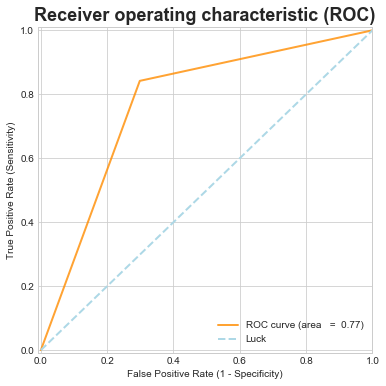

In [26]:
plt. figure (figsize =(6,   6))
plt.plot(fpr, tpr ,   lw=2,
         label = 'ROC curve (area   = {0: 0.2f})'.format(roc_auc), color= 'darkorange', alpha = .8)
plt.plot([0,   1],   [0,   1], lw=2,   c   = 'k',   linestyle ='--', label = 'Luck', color = 'lightblue')
plt.xlim([-0.01, 1.0 ])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver operating characteristic (ROC)', fontweight ='bold',   fontsize =18)
plt.legend(loc= "lower right")

##### Plot with probabilities

In [27]:
probas_ = logReg.fit(feature_train, response_train).predict_proba(feature_test)

In [28]:
# Compute ROC curve and area the curve
fpr, tpr, thresholds = metrics.roc_curve(response_test, probas_[:, 1])
roc_auc   =   metrics.auc(fpr , tpr)

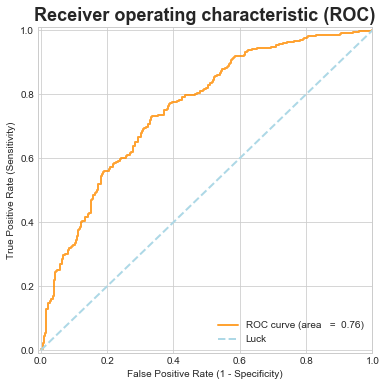

In [29]:
plt. figure (figsize =(6,   6))
plt.plot(fpr, tpr ,   lw=2,
         label = 'ROC curve (area   = {0: 0.2f})'.format(roc_auc), color ='darkorange', alpha = .8)
plt.plot([0,   1],   [0,   1], lw=2,   c   = 'k',   linestyle ='--', label = 'Luck', color = 'lightblue')
plt.xlim([-0.01, 1.0 ])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver operating characteristic (ROC)', fontweight ='bold',   fontsize =18)
plt.legend(loc= "lower right")

### 3.3.2. classweight balanced

In [30]:
 #   Import   necessary   functions
from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn.linear_model import LogisticRegression
#   Create   k-Fold   CV   and   LogReg   object
kFold = StratifiedKFold(n_splits =5, random_state =0)
logReg = LogisticRegression(class_weight = 'balanced')
#   Run   CV   and   print   results
scores =  cross_val_score(logReg, feature_train, response_train, cv= kFold )
print(scores)
print('CV accuracy on train set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores)))

[0.63732394 0.66197183 0.60670194 0.68077601 0.64310954]
CV accuracy on train set:  0.646 +/-  0.025


In [31]:
scores = cross_val_score(logReg, feature_train, response_train, cv=kFold , scoring = 'roc_auc')
print ('CV  AUC on train set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores)))

CV  AUC on train set:  0.701 +/-  0.029


In [32]:
from   sklearn . model_selection   import   cross_validate
#   Calculate   return
measures = ['accuracy', 'recall', 'roc_auc']
scores = cross_validate(logReg, feature_train, response_train, cv=kFold, scoring = measures, n_jobs =2)
scores

{'fit_time': array([0.43062162, 0.4326489 , 0.4632318 , 0.50133276, 0.51286221]),
 'score_time': array([0.03559661, 0.10177135, 0.00253725, 0.00250888, 0.00200748]),
 'test_accuracy': array([0.63732394, 0.66197183, 0.60670194, 0.68077601, 0.64310954]),
 'test_recall': array([0.64848485, 0.67272727, 0.62613982, 0.70516717, 0.65957447]),
 'test_roc_auc': array([0.71265597, 0.70516934, 0.65327833, 0.74148808, 0.69061085]),
 'train_accuracy': array([0.7037037 , 0.69091711, 0.70515646, 0.69722345, 0.69867841]),
 'train_recall': array([0.71374336, 0.69324222, 0.71092564, 0.70561457, 0.70713202]),
 'train_roc_auc': array([0.76969054, 0.76650483, 0.77871867, 0.76564721, 0.77457011])}

In [33]:
print('Train set accuracy (CV=5): ' ,scores ['train_accuracy'].mean())
print('Validation set scores (CV=5): ',scores ['test_accuracy'].mean())
print('Test set accuracy : ',logReg.fit(feature_test , response_test).score(feature_test, response_test))

Train set accuracy (CV=5):  0.6991358256850763
Validation set scores (CV=5):  0.6459766538857101
Test set accuracy :  0.7676056338028169


#### Prediction

In [34]:
y_pred1 = logReg.predict(X_test)
display(y_pred1[0:20])

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1],
      dtype=int64)

In [35]:
print("")
print('Metrics of Classification with SVM1 (random parameters), kernel rbf:')
print("")
print(metrics.classification_report(response_test, y_pred1))
print("")
print('Confusion Matrix with SVM1 (random parameters), kernel rbf:')
print("")
print(metrics.confusion_matrix(response_test, y_pred1))


Metrics of Classification with SVM1 (random parameters), kernel rbf:

             precision    recall  f1-score   support

          0       0.71      0.77      0.74       305
          1       0.82      0.77      0.79       405

avg / total       0.77      0.77      0.77       710


Confusion Matrix with SVM1 (random parameters), kernel rbf:

[[235  70]
 [ 95 310]]


##### different precision scores

In [36]:
# Precision
from sklearn.metrics import precision_score
precision_score(response_test, y_pred1, labels=None, pos_label=1, average= 'binary', sample_weight=None)

0.8157894736842105

In [37]:
print('Precision scores for different input data')
print(55*'_')
print('')
# precision train set
scores = cross_val_score(logReg, feature_train, response_train, cv=kFold , scoring = 'precision')
print('CV precision on train set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores)))
print('')
# precision test set
scores = cross_val_score(logReg, feature_test, response_test, cv=kFold , scoring = 'precision')
print('CV precision on test set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores)))
print('')
# precision prediction
scores = cross_val_score(logReg, feature_test, y_pred1, cv=kFold , scoring = 'precision')
print('CV precision on test prediction set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores)))
print('')
# precision y true and y predicted set
scores = cross_val_score(logReg, response_test, y_pred1, cv=kFold , scoring = 'precision')
print('CV precision on prediction set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores)))
print('')

Precision scores for different input data
_______________________________________________________

CV precision on train set:  0.709 +/-  0.021

CV precision on test set:  0.703 +/-  0.032

CV precision on test prediction set:  0.885 +/-  0.038

CV precision on prediction set:  0.767 +/-  0.024



##### different recall scores

In [38]:
# Recall
from sklearn.metrics import recall_score
recall_score(response_test, y_pred1, labels=None, pos_label=1, average= 'binary', sample_weight=None)

0.7654320987654321

In [39]:
print('Recall scores for different input data')
print(55*'_')
print('')
# recall train set
scores = cross_val_score(logReg, feature_train, response_train, cv=kFold , scoring = 'recall')
print('CV recall on train set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores)))
print('')
# recall test set
scores = cross_val_score(logReg, feature_test, response_test, cv=kFold , scoring = 'recall')
print('CV recall on test set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores)))
print('')
# recall prediction
scores = cross_val_score(logReg, feature_test, y_pred1, cv=kFold , scoring = 'recall')
print('CV recall on test prediction set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores)))
print('')
# recall y true and y predicted set
scores = cross_val_score(logReg, response_test, y_pred1, cv=kFold , scoring = 'recall')
print('CV recall on prediction set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores)))

Recall scores for different input data
_______________________________________________________

CV recall on train set:  0.662 +/-  0.026

CV recall on test set:  0.667 +/-  0.043

CV recall on test prediction set:  0.868 +/-  0.053

CV recall on prediction set:  0.816 +/-  0.017


#### Plot

##### Plot with absolut numbers

In [40]:
 #   Compute   ROC   curve   and   ROC   area   (AUC)   for   each   class
fpr ,   tpr ,   thresholds   =   metrics.roc_curve(response_test, y_pred1)
roc_auc   =   metrics.auc(fpr , tpr)

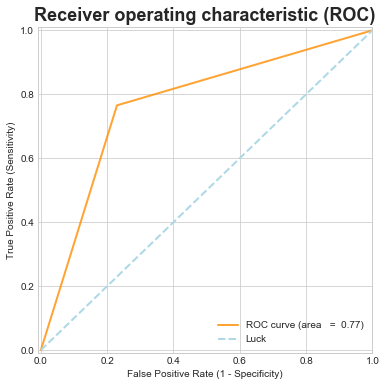

In [41]:
plt. figure (figsize =(6,   6))
plt.plot(fpr, tpr ,   lw=2,
         label = 'ROC curve (area   = {0: 0.2f})'.format(roc_auc), color= 'darkorange', alpha = .8)
plt.plot([0,   1],   [0,   1], lw=2,   c   = 'k',   linestyle ='--', label = 'Luck', color = 'lightblue')
plt.xlim([-0.01, 1.0 ])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver operating characteristic (ROC)', fontweight ='bold',   fontsize =18)
plt.legend(loc= "lower right")

##### Plot with probabilities

In [42]:
probas_ = logReg.fit(feature_train, response_train).predict_proba(feature_test)

In [43]:
# Compute ROC curve and area the curve
fpr, tpr, thresholds = metrics.roc_curve(response_test, probas_[:, 1])
roc_auc   =   metrics.auc(fpr , tpr)

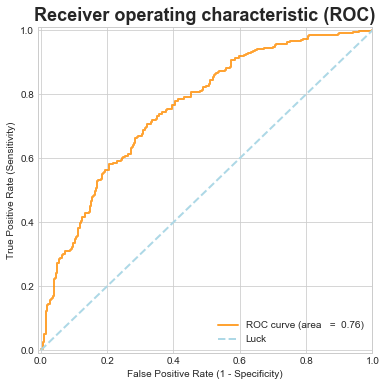

In [44]:
plt. figure (figsize =(6,   6))
plt.plot(fpr, tpr ,   lw=2,
         label = 'ROC curve (area   = {0: 0.2f})'.format(roc_auc), color ='darkorange', alpha = .8)
plt.plot([0,   1],   [0,   1], lw=2,   c   = 'k',   linestyle ='--', label = 'Luck', color = 'lightblue')
plt.xlim([-0.01, 1.0 ])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver operating characteristic (ROC)', fontweight ='bold',   fontsize =18)
plt.legend(loc= "lower right")

## Results

In [ ]:
# -> Logistic Regression with class_weight balanced returns best confusion matrix
# -> overall best result: Version 2 but if we have to choose between reduced datasets best result gives Version 1.1

In [ ]:
# -> balanced reduces scores (cv accuracy, train and test) but results in a "better" (more balanced) confusion matrix